Epoch: 1/30 - Train Loss: 0.5760 - Train Accuracy: 0.8433 - Val Loss: 0.5993 - Val Accuracy: 0.8412
Epoch: 2/30 - Train Loss: 0.4026 - Train Accuracy: 0.8876 - Val Loss: 0.4409 - Val Accuracy: 0.8798
Epoch: 3/30 - Train Loss: 0.3279 - Train Accuracy: 0.9068 - Val Loss: 0.3785 - Val Accuracy: 0.8940
Epoch: 4/30 - Train Loss: 0.2810 - Train Accuracy: 0.9186 - Val Loss: 0.3378 - Val Accuracy: 0.9070
Epoch: 5/30 - Train Loss: 0.2466 - Train Accuracy: 0.9285 - Val Loss: 0.3087 - Val Accuracy: 0.9128
Epoch: 6/30 - Train Loss: 0.2227 - Train Accuracy: 0.9354 - Val Loss: 0.2891 - Val Accuracy: 0.9192
Epoch: 7/30 - Train Loss: 0.2051 - Train Accuracy: 0.9404 - Val Loss: 0.2760 - Val Accuracy: 0.9228
Epoch: 8/30 - Train Loss: 0.1891 - Train Accuracy: 0.9451 - Val Loss: 0.2668 - Val Accuracy: 0.9247
Epoch: 9/30 - Train Loss: 0.1762 - Train Accuracy: 0.9496 - Val Loss: 0.2566 - Val Accuracy: 0.9287
Epoch: 10/30 - Train Loss: 0.1656 - Train Accuracy: 0.9524 - Val Loss: 0.2491 - Val Accuracy: 0.9307

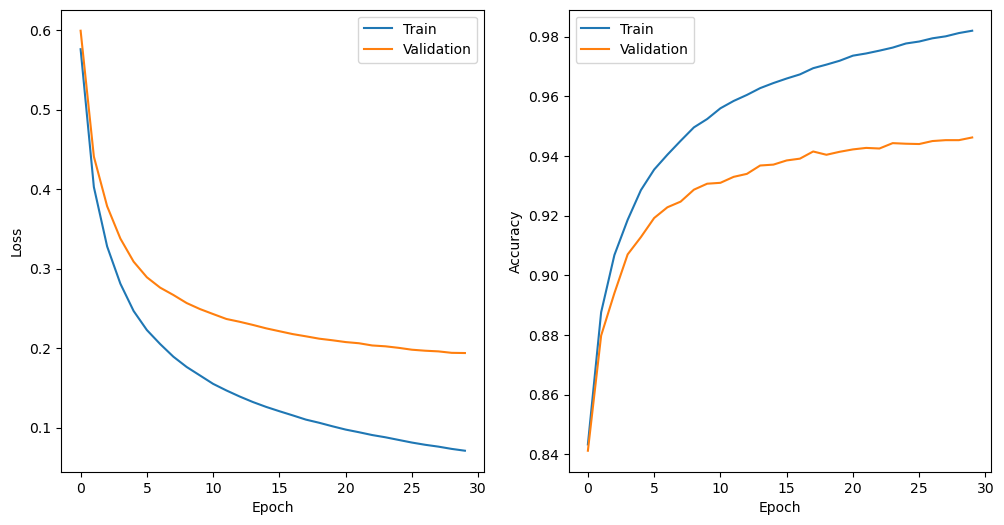

Test accuracy: 0.9486


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

class NN:
    """
        Implementation of a 2-layer feed-forward network with softmax output.
    """
    def __init__(self, n_hidden, n_output, epochs, batch_size, learning_rate):
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        """
        Compute the sigmoid function for the input here.
        """
        ### YOUR CODE HERE
        
        # Compute the sigmoid function
        s = 1 / (1 + np.exp(-x))
        
        ### END YOUR CODE
        return s

    def sigmoid_deriv(self, x):
        """
        Compute the derivative of the sigmoid function here.
        """
        ### YOUR CODE HERE
        
        # The derivative of the sigmoid function σ(x) is the sigmoid function σ(x) multiplied by 1−σ(x).
        d = self.sigmoid(x) * (1 - self.sigmoid(x))
        
        ### END YOUR CODE
        return d

    def softmax(self, x):
        """
        Compute softmax function for input.
        """
        ### YOUR CODE HERE
        
        # Subtract the maximum value for numerical stability
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))  
        
        # Compute the softmax function
        s = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  
        
        ### END YOUR CODE
        return s

    def feed_forward(self, X):
        """
        Forward propagation
        return cache: a dictionary containing the activations of all the units
               output: the predictions of the network
        """
        ### YOUR CODE HERE
        
        # Compute the weighted sum of inputs X and weights W1, add bias b1
        Z1 = np.dot(X, self.W1) + self.b1
        # Apply the sigmoid activation function to the result, storing it in A1
        A1 = self.sigmoid(Z1)
        
        # Compute the weighted sum of A1 and weights W2, add bias b2
        Z2 = np.dot(A1, self.W2) + self.b2
        # Apply the softmax activation function to the result, storing it in A2
        A2 = self.softmax(Z2)
        
        # Set the output as the result of the softmax activation
        output=A2
        
        ### END YOUR CODE
        cache = {}
        cache['Z1'] = Z1
        cache['A1'] = A1
        cache['Z2'] = Z2
        cache['A2'] = A2
        return cache, output

    def back_propagate(self, X, y, cache):
        """
        Return the gradients of the parameters
        """
        ### YOUR CODE HERE
        
        # Get the number of training examples
        m = X.shape[0]
        
        # Compute the gradient of the loss with respect to the output A2
        dZ2 = cache['A2'] - y
        # Compute the gradient of the loss with respect to W2
        dW2 = (1 / m) * np.dot(cache['A1'].T, dZ2)
        # Compute the gradient of the loss with respect to b2
        db2 = (1 / m) * np.sum(dZ2, axis=0)
        
        # Compute the gradient of the loss with respect to A1
        dA1 = np.dot(dZ2, self.W2.T)
        # Compute the gradient of the loss with respect to Z1
        dZ1 = dA1 * self.sigmoid_deriv(cache['Z1'])
        # Compute the gradient of the loss with respect to W1
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        # Compute the gradient of the loss with respect to b1
        db1 = (1 / m) * np.sum(dZ1, axis=0)
        
        ### END YOUR CODE

        grads = {}
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2

        return grads

    def init_weights(self, n_input):
        ### YOUR CODE HERE
        
        # Initialize weights for the first layer (input to hidden)
        self.W1 = np.random.randn(n_input, self.n_hidden)
        # Initialize biases for the first layer with zeros
        self.b1 = np.zeros((1, self.n_hidden))
        
        # Initialize weights for the second layer (hidden to output) 
        self.W2 = np.random.randn(self.n_hidden, self.n_output)
        # Initialize biases for the second layer with zeros
        self.b2 = np.zeros((1, self.n_output))
        
        ### END YOUR CODE

    def update_weights(self, grads):
        ### YOUR CODE HERE
        
        # Update the weights of the first layer (input to hidden) using the gradient and learning rate
        self.W1 -= self.learning_rate * grads['W1']
        # Update the biases of the first layer using the gradient and learning rate
        self.b1 -= self.learning_rate * grads['b1']
        
        # Update the weights of the second layer (hidden to output) using the gradient and learning rate
        self.W2 -= self.learning_rate * grads['W2']
        # Update the biases of the second layer using the gradient and learning rate
        self.b2 -= self.learning_rate * grads['b2']
        
        ### END YOUR CODE

    def compute_loss(self, y, output):  #DONE
        """
        Return the cross-entropy loss
        """
        ### YOUR CODE HERE
        
        # Number of examples
        m = y.shape[0]  
        
        # Add a small epsilon to avoid numerical instability
        loss = -np.sum(y * np.log(output + 1e-8)) / m
        
        ### END YOUR CODE
        return loss
    
    def train(self, X_train, y_train, X_val, y_val):
        (n, m) = X_train.shape
        
        # Initialize the weights with the number of features in the input data
        self.init_weights(m)
        
        ### YOUR CODE HERE
        
        # Initialize lists to store training and validation losses and accuracies
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        
        # Loop over the specified number of epochs
        for epoch in range(self.epochs):
            # Shuffle the training data
            p = np.random.permutation(X_train.shape[0])
            X_train = X_train[p]
            y_train = y_train[p]

            # Mini-batch gradient descent
            for i in range(0, X_train.shape[0], self.batch_size):
                X_batch = X_train[i:i+self.batch_size]
                y_batch = y_train[i:i+self.batch_size]

                # Forward propagation
                cache, output = self.feed_forward(X_batch)

                # Backward propagation
                grads = self.back_propagate(X_batch, y_batch, cache)

                # Update weights
                self.update_weights(grads)

            # Compute train loss and accuracy
            _, train_output = self.feed_forward(X_train)
            train_loss = self.compute_loss(y_train, train_output)
            train_accuracy = self.compute_accuracy(y_train, train_output)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            # Compute validation loss and accuracy
            _, val_output = self.feed_forward(X_val)
            val_loss = self.compute_loss(y_val, val_output)
            val_accuracy = self.compute_accuracy(y_val, val_output)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            # Print progress for each epoch
            print("Epoch: {:d}/{:d} - Train Loss: {:.4f} - Train Accuracy: {:.4f} - Val Loss: {:.4f} - Val Accuracy: {:.4f}".format(epoch+1, self.epochs, train_loss, train_accuracy, val_loss, val_accuracy))

        # Plot the training loss and accuracy curves
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train')
        plt.plot(val_losses, label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(train_accuracies, label='Train')
        plt.plot(val_accuracies, label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        ### END YOUR CODE
        
    def test(self, X_test, y_test):
        cache, output = self.feed_forward(X_test)
        accuracy = self.compute_accuracy(output, y_test)
        return accuracy

    def compute_accuracy(self, y, output):
        accuracy = (np.argmax(y, axis=1) == np.argmax(output, axis=1)).sum() * 1. / y.shape[0]
        return accuracy

    def one_hot_labels(self, y):
        one_hot_labels = np.zeros((y.size, self.n_output))
        one_hot_labels[np.arange(y.size), y.astype(int)] = 1
        return one_hot_labels

def main():
    nn = NN(n_hidden=300, n_output=10, epochs=30, batch_size=1000, learning_rate=5)
    np.random.seed(100)

    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
    X = (X / 255).astype('float32')
    
    np.random.seed(100)
    
    X_train, y_train = X[0:60000], y[0:60000]
    y_train = nn.one_hot_labels(y_train)
    p = np.random.permutation(60000)
    X_train = X_train[p]
    y_train = y_train[p]

    X_val = X_train[0:10000]
    y_val = y_train[0:10000]
    X_train = X_train[10000:]
    y_train = y_train[10000:]

    X_test, y_test = X[60000:], y[60000:]
    y_test = nn.one_hot_labels(y_test)

    nn.train(X_train, y_train, X_val, y_val)

    accuracy = nn.test(X_test, y_test)
    print(f'Test accuracy: {accuracy}')

if __name__ == '__main__':
    main()